In [38]:
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("games-features.csv")

In [3]:
df.shape

(13357, 78)

In [4]:
len(df.columns)

78

In [5]:
df.isnull().sum()

QueryID                        0
ResponseID                     0
QueryName                      1
ResponseName                   0
ReleaseDate                    0
RequiredAge                    0
DemoCount                      0
DeveloperCount                 0
DLCCount                       0
Metacritic                     0
MovieCount                     0
PackageCount                   0
RecommendationCount            0
PublisherCount                 0
ScreenshotCount                0
SteamSpyOwners                 0
SteamSpyOwnersVariance         0
SteamSpyPlayersEstimate        0
SteamSpyPlayersVariance        0
AchievementCount               0
AchievementHighlightedCount    0
ControllerSupport              0
IsFree                         0
FreeVerAvail                   0
PurchaseAvail                  0
SubscriptionAvail              0
PlatformWindows                0
PlatformLinux                  0
PlatformMac                    0
PCReqsHaveMin                  0
          

In [6]:
genre_cols = [c for c in df.columns if not c.find("GenreIs")]

In [7]:
genres = []
for column in genre_cols:
    genres.append(column.split('GenreIs')[1])

In [8]:
genre_dict = dict(zip(genres,range(1,len(genres)+1)))

In [9]:
# new_genre_column = []
# for row in df[genre_cols].iterrows():
#     row_str=""
#     for column in genre_cols:
#         if row[1][column]:
#             row_str += str(genre_dict.get(column.split('GenreIs')[1]))
#     if row_str:
#         new_genre_column.append(row_str)
#     else:
#         new_genre_column.append("0")

In [10]:
new_genre_column = []
for row in df[genre_cols].iterrows():
    genre_score = 0
    for column in genre_cols:
        if row[1][column]:
            genre_score += 1
    new_genre_column.append(genre_score)

In [11]:
len(new_genre_column)

13357

In [12]:
plat_cols = [c for c in df.columns if not c.find("Platform")]

In [13]:
new_plat_column = []
for row in df[plat_cols].iterrows():
    plat_score = 0
    for column in plat_cols:
        if row[1][column]:
            plat_score += 1
    new_plat_column.append(plat_score)

In [14]:
len(new_plat_column)

13357

In [15]:
cat_cols = [c for c in df.columns if not c.find("Category")]

In [16]:
new_cat_column = []
for row in df[cat_cols].iterrows():
    cat_score = 0
    for column in cat_cols:
        if row[1][column]:
            cat_score += 1
    new_cat_column.append(cat_score)

In [17]:
len(new_cat_column)

13357

In [18]:
drop_genre_is = [c for c in df.columns if c.find("GenreIs")]

In [19]:
df = df[drop_genre_is]

In [20]:
drop_platform_is = [c for c in df.columns if c.find("PlatformIs")]

In [21]:
df = df[drop_platform_is]

In [22]:
drop_category_is = [c for c in df.columns if c.find("Category")]

In [23]:
df = df[drop_category_is]

In [24]:
df["GenreScore"] = new_genre_column
df["PlatformScore"] = new_plat_column
df["CategoryScore"] = new_cat_column

In [25]:
featured_cols = ["ResponseName",
                 "ReleaseDate",
                 "RequiredAge",
                 "DLCCount",
                 "Metacritic",
                 "MovieCount",
                 "RecommendationCount",
                 "ScreenshotCount",
                 "SteamSpyOwners",
                 "SteamSpyPlayersEstimate",
                 "PriceFinal",
                 "GenreScore",
                 "PlatformScore",
                 "CategoryScore"]

In [26]:
steam_df = df[featured_cols]

In [27]:
steam_df.head()

,ResponseName,ReleaseDate,RequiredAge,DLCCount,Metacritic,MovieCount,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyPlayersEstimate,PriceFinal,GenreScore,PlatformScore,CategoryScore
0,Counter-Strike,Nov 1 2000,0,0,88,0,68991,13,13033334,9140731,9.99,1,3,1
1,Team Fortress Classic,Apr 1 1999,0,0,0,0,2439,5,5399140,753627,4.99,1,3,1
2,Day of Defeat,May 1 2003,0,0,79,0,2319,5,7621102,1709740,4.99,1,3,1
3,Deathmatch Classic,Jun 1 2001,0,0,0,0,888,4,7498965,789676,4.99,1,3,1
4,Half-Life: Opposing Force,Nov 1 1999,0,0,0,0,2934,5,5399499,705741,4.99,1,3,2


In [28]:
dates = list(steam_df.ReleaseDate.str.split())

In [30]:
for i,y in enumerate(dates):
    match = re.match(r'.*([1-3][0-9]{3})', str(y))
    if match is not None:
        dates[i] = match.group(1)
    else:
        dates[i] = "0000"

In [ ]:
steam_df.ReleaseDate = pd.to_numeric(dates)

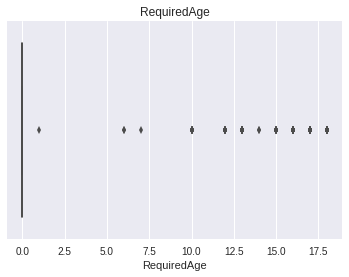

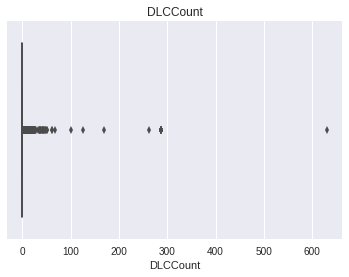

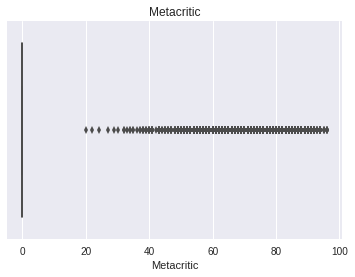

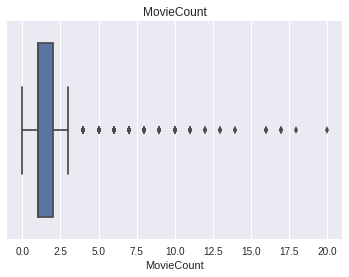

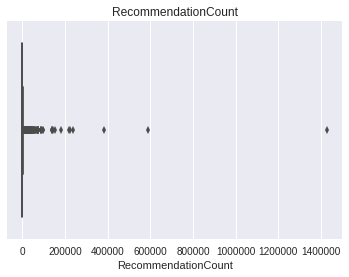

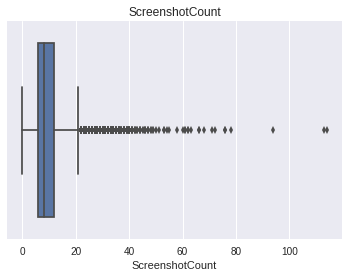

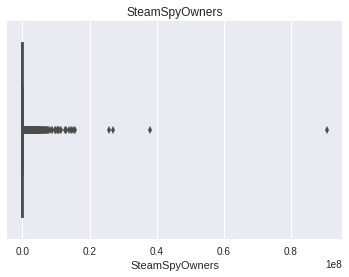

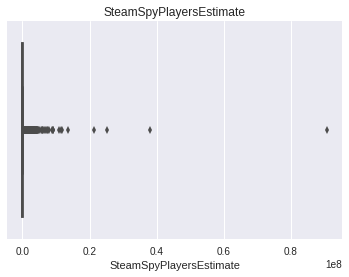

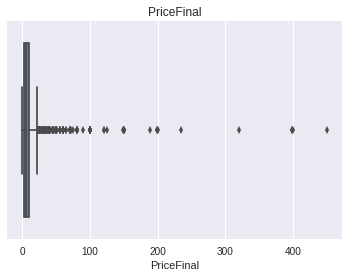

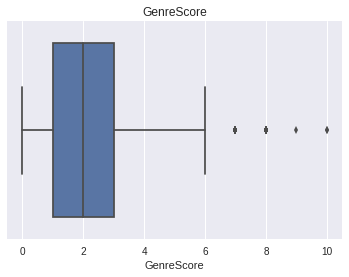

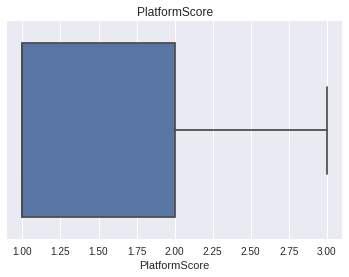

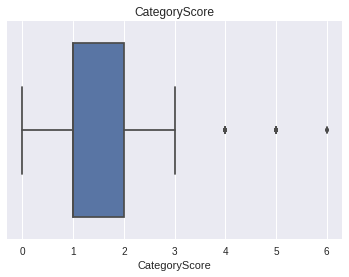

In [40]:
for column in steam_df.columns.drop(['ResponseName','ReleaseDate']):
    plt.figure()
    plt.title(column)
    sns.boxplot(pd.to_numeric(df[column]))

In [41]:
plt.close('all')

In [44]:
steam_df = steam_df.query('DLCCount < 600')
steam_df = steam_df.query('RecommendationCount < 1400000')
steam_df = steam_df.query('SteamSpyOwners < 90687580')
steam_df = steam_df.query('SteamSpyPlayersEstimate < 90687580')
steam_df = steam_df.query('PriceFinal < 300')

In [45]:
len(steam_df)

13349

In [46]:
steam_df.to_csv("steam_df.csv")